# Notas dos Filmes

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [9]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [10]:
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [11]:
print(f"Média das notas: {notas.nota.mean():.2f}")
print(f"Mediana das notas: {notas.nota.median():.2f}")


Média das notas: 3.50
Mediana das notas: 3.50


In [12]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

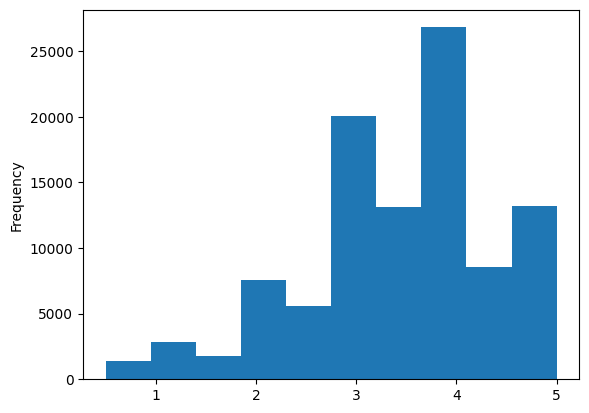

In [13]:
notas.nota.plot(kind="hist")

<Axes: xlabel='nota'>

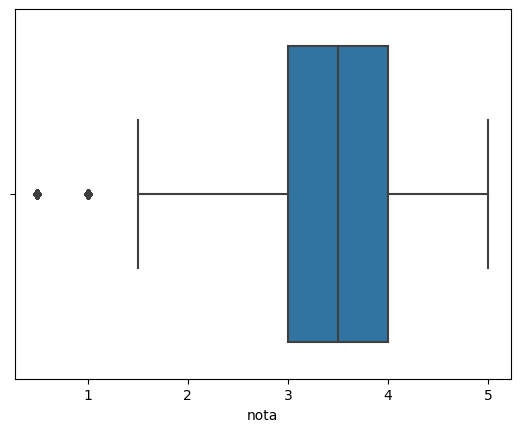

In [14]:
sns.boxplot(x=notas.nota)

# Filmes

In [15]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

In [17]:
notas.query("filmeId == 2").nota.mean()

3.4318181818181817

In [18]:
media_notas_filmes = notas.groupby("filmeId").mean().nota

<Axes: ylabel='Frequency'>

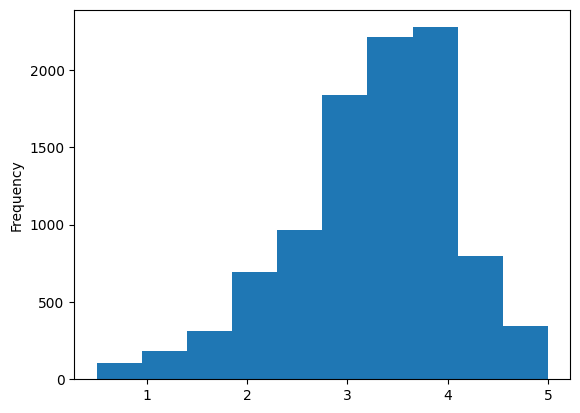

In [19]:
media_notas_filmes.plot(kind="hist")

<Axes: xlabel='nota', ylabel='Count'>

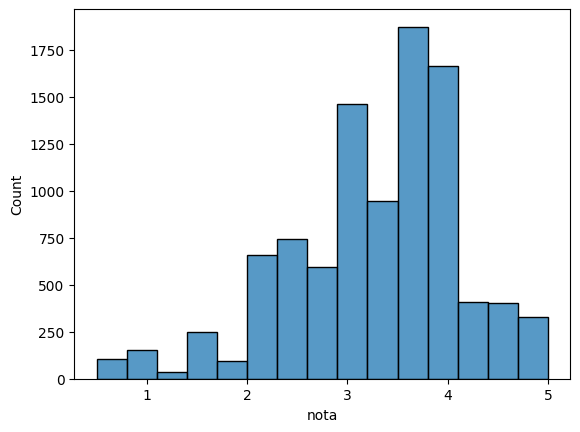

In [20]:
sns.histplot(media_notas_filmes, bins=15)

In [21]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0


In [22]:
tmdb.vote_average.unique()

array([7.2, 6.9, 6.3, 7.6, 6.1, 5.9, 7.4, 7.3, 5.7, 5.4, 7. , 6.5, 6.4,
       6.2, 7.1, 5.8, 6.6, 7.5, 5.5, 6.7, 6.8, 6. , 5.1, 7.8, 5.6, 5.2,
       8.2, 7.7, 5.3, 8. , 4.8, 4.9, 7.9, 8.1, 4.7, 5. , 4.2, 4.4, 4.1,
       3.7, 3.6, 3. , 3.9, 4.3, 4.5, 3.4, 4.6, 8.3, 3.5, 4. , 2.3, 3.2,
       0. , 3.8, 2.9, 8.5, 1.9, 3.1, 3.3, 2.2, 0.5, 9.3, nan])

In [23]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'zh', 'ja', 'ru', 'cn', 'es', 'de', 'ko', 'hi', 'te', 'it',
       'nl', 'ta'],
      dtype='object')

In [24]:
tmdb["original_language"].value_counts().values

array([2367,   19,   13,    7,    6,    6,    5,    5,    2,    1,    1,
          1,    1,    1])

In [25]:
contagem_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_lingua.columns = ["original_language", "total"]
contagem_lingua.head()

,original_language,total
0,en,2367
1,fr,19
2,zh,13
3,ja,7
4,ru,6


<Axes: xlabel='original_language', ylabel='total'>

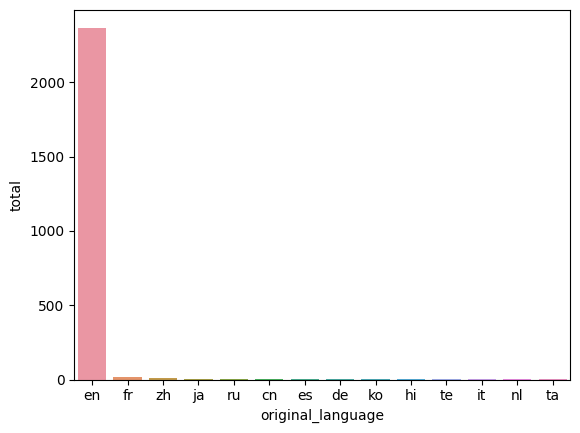

In [26]:
sns.barplot(x="original_language", y="total", data=contagem_lingua)

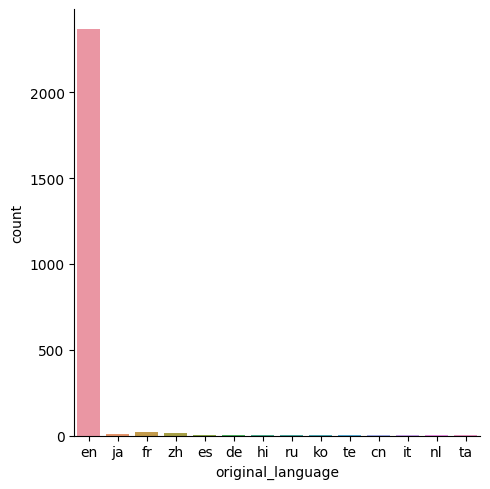

In [27]:
sns.catplot(x="original_language", kind="count", data=tmdb)

In [28]:
contagem_ingles = tmdb.query("original_language == 'en'")["original_language"].count()
contagem_resto = tmdb.query("original_language != 'en'")["original_language"].count()
dados = {
    "lingua": ["ingles", "outras"],
    "total": [contagem_ingles, contagem_resto],
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,2367
1,outras,68


<Axes: xlabel='lingua', ylabel='total'>

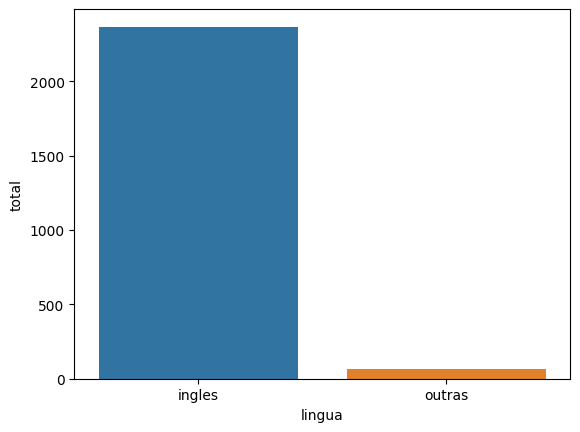

In [29]:
sns.barplot(x="lingua", y="total", data=dados)

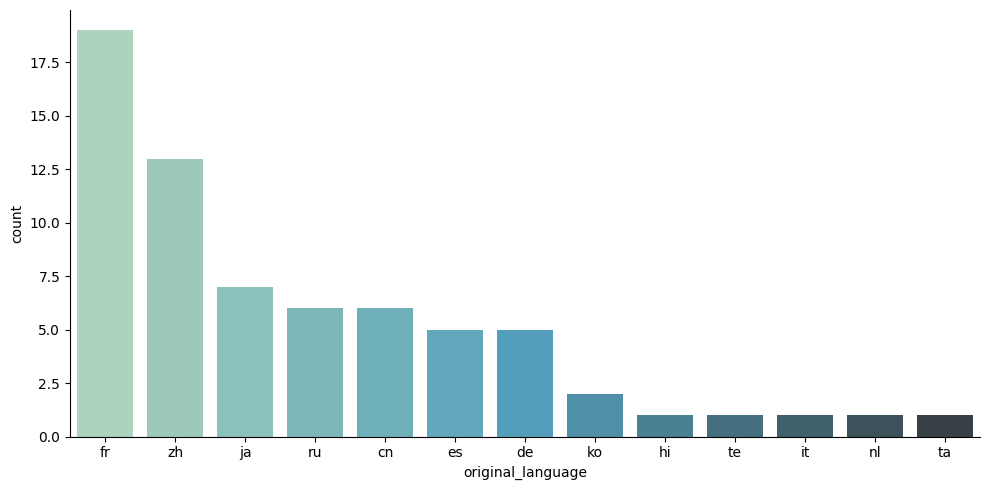

In [30]:
filmes_com_outra_lingua = tmdb.query("original_language != 'en'")
ordem_das_linguas = filmes_com_outra_lingua["original_language"].value_counts().index
sns.catplot(data= filmes_com_outra_lingua, kind="count", x="original_language", aspect=2, order= ordem_das_linguas, palette="GnBu_d")

In [31]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [32]:
notas.head(2)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [33]:
notas_toy_story = notas.query("filmeId == 1")["nota"]
notas_jumanji = notas.query("filmeId == 2")["nota"]

print(len(notas_toy_story), len(notas_jumanji))

215 110


In [34]:
print(f"Nota média de Toy Story: {notas_toy_story.mean():.2f}")
print(f"Nota média de Jumanji: {notas_jumanji.mean():.2f}")

Nota média de Toy Story: 3.92
Nota média de Jumanji: 3.43


In [35]:
print(f"Nota mediana de Toy Story: {notas_toy_story.median():.2f}")
print(f"Nota mediana de Jumanji: {notas_jumanji.median():.2f}")

Nota mediana de Toy Story: 4.00
Nota mediana de Jumanji: 3.50


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7582ab7130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7582ab7550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7582aa4e50>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7582ab7a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7582ab7d30>,
 'means': []}

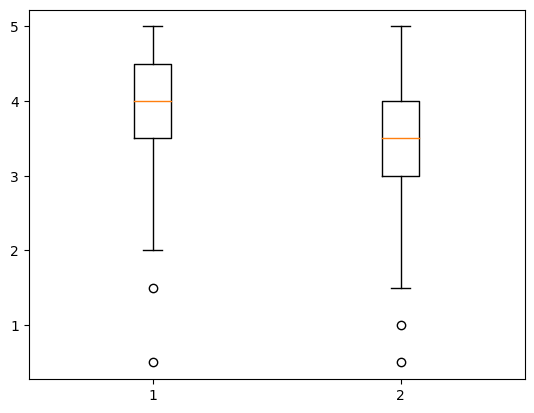

In [36]:
plt.boxplot([notas_toy_story, notas_jumanji])

In [37]:
notas.query("filmeId in [1,2]")


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
560,6,2,4.0,845553522
874,7,1,4.5,1106635946
1026,8,2,4.0,839463806
...,...,...,...,...
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
98667,608,2,2.0,1117490786
99497,609,1,3.0,847221025


<Axes: xlabel='filmeId', ylabel='nota'>

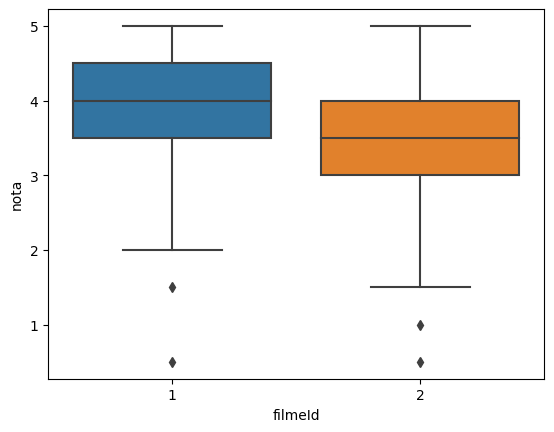

In [38]:
sns.boxplot( x="filmeId", y="nota",data = notas.query("filmeId in [1,2]"))

In [39]:
notas_toy_story.std()

0.8348591407114047

In [40]:
notas_jumanji.std()

0.8817134921476455